 incorporating physical principles into machine learning.

Machine learning has become increasingly popular across science, but do these algorithms actually “understand” the scientific problems they are trying to solve? In this article we explain physics-informed neural networks, which are a powerful way of incorporating physical principles into machine learning.

Learning to model experimental data

Let’s look at one way machine learning can be used for scientific research. Imagine we are given some experimental data points that come from some unknown physical phenomenon, e.g. the orange points in the animation below.


A common scientific task is to find a model which is able to accurately predict new experimental measurements given this data.

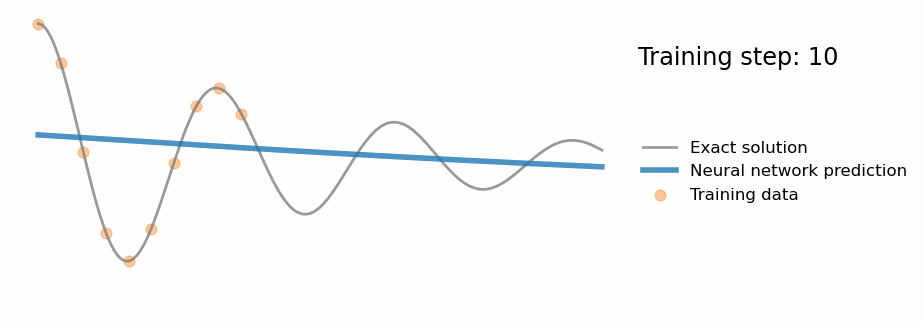

One popular way of doing this using machine learning is to use a neural network. Given the location of a data point as input (denoted x), a neural network can be used to output a prediction of its value (denoted u), as shown in the figure below:

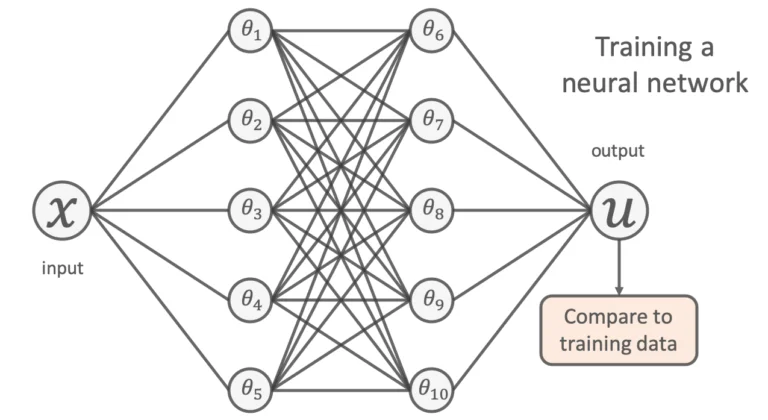

o learn a model, we try to tune the network’s free parameters (denoted by the \thetas in the figure above) so that the network’s predictions closely match the available experimental data. This is usually done by minimising the mean-squared-error between its predictions and the training points;

  \[\mathrm{min}~&\frac{1}{N} \sum^{N}_{i} (u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) )^2\]

The result of training such a neural network using the experimental data above is shown in the animation.

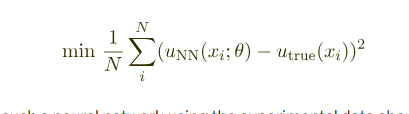

The “naivety” of purely data-driven approaches
The problem is, using a purely data-driven approach like this can have significant downsides. Have a look at the actual values of the unknown physical process used to generate the experimental data in the animation above (grey line).

You can see that whilst the neural network accurately models the physical process within the vicinity of the experimental data, it fails to generalise away from this training data. By only relying on the data, one could argue it hasn’t truly “understood” the scientific problem.

### The rise of scientific machine learning (SciML)


What if I told you that we already knew something about the physics of this process? Specifically, that the data points are actually measurements of the position of a damped harmonic oscillator:

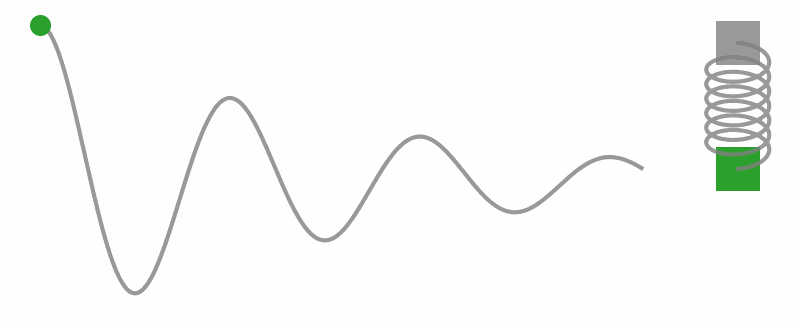

This is a classic physics problem, and we know that the underlying physics can be described by the following differential equation:


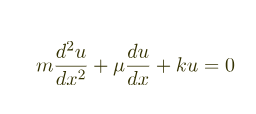
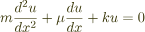

Where m is the mass of the oscillator, \mu is the coefficient of friction and k is the spring constant.
Given the limitations of “naive” machine learning approaches like the one above, researchers are now looking for ways to include this type of prior scientific knowledge into our machine learning workflows, in the blossoming field of scientific machine learning (SciML).

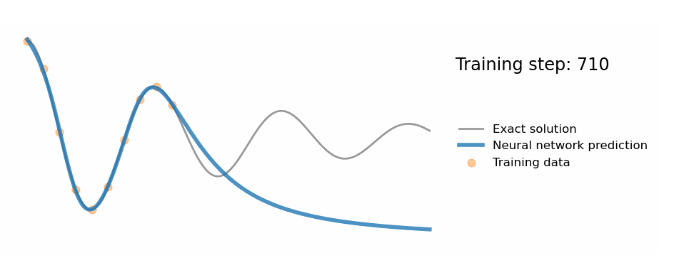

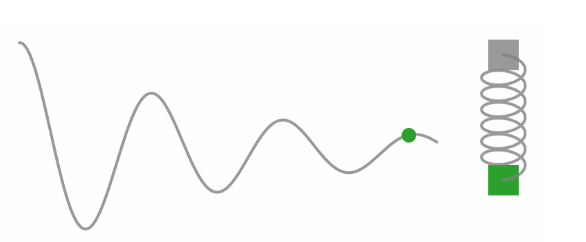

So, what is a physics-informed neural network?


One way to do this for our problem is to use a physics-informed neural network [1,2]. The idea is very simple: add the known differential equations directly into the loss function when training the neural network.

This is done by sampling a set of input training locations (\{x_{j}\}) and passing them through the network. Next gradients of the network’s output with respect to its input are computed at these locations (which are typically analytically available for most neural networks, and can be easily computed using autodifferentiation). Finally, the residual of the underlying differential equation is computed using these gradients, and added as an extra term in the loss function.



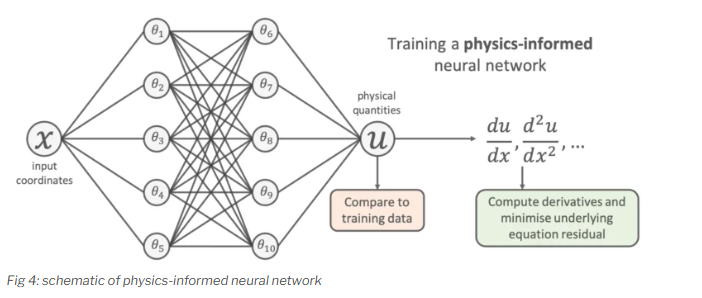

Let’s do this for the problem above. This amounts to using the following loss function to train the network:

  

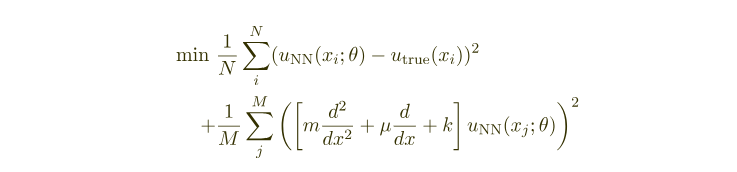

We can see that the additional “physics loss” in the loss function tries to ensure that the solution learned by the network is consistent with the known physics.

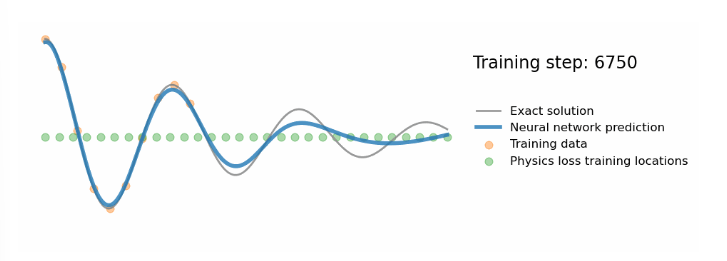

### physics loss function